# HW2

##### PHYS434 - Advanced Laboratory: Computational Data Analysis
##### Professor: Miguel Morales
<br>

##### Due date: 10/14/2021
##### By Erik Solhaug
<br>

In [1]:
# Importing needed libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats, signal

# This sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)
# This sets the fontsize of the x- and y-labels
fsize = 30

## 1)

On two six-sided dice, you are more likely to roll a sum of seven than two ones. There are simply more ways to get two numbers totaling seven than totaling two.

$P(two\:ones) = P(one) \cdot P(one) = \frac{1}{6} \cdot \frac{1}{6} = \frac{1}{36}$

$P(sum\:of\:seven) = \sum_{z}^{} P_A(z) \cdot P_B(x-z) = \frac{6}{36} = \frac{1}{6}$

## 2)

The convolution operator is the following:
$$P_A(x)*P_B(x) = \int{P_A(x) \cdot P_B(x-z) \: dz} = P_{A+B}(x)$$

We can calculate the probability of getting a sum of seven two ways...

**Analytically (math and counting):**

Doing the convolution by math, we do:
$$P(6) \cdot P(1) + P(5) \cdot P(2) + P(4) \cdot P(3) + P(3) \cdot P(4) + P(2) \cdot P(5) + P(1) \cdot P(6)
\\  = 6 \cdot (\frac{1}{6} \cdot \frac{1}{6}) = \frac{6}{36} = \frac{1}{6}$$

The probability of getting a sum of seven is thus $\frac{1}{6}$.

**Numerically (computer program):**

In [31]:
number_of_dice = 2
die1 = np.ones(6)*(1/6)
die2 = die1
die1, die2

(array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667]),
 array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667]))

In [32]:
c = signal.convolve(die1, die2)
c

array([0.02777778, 0.05555556, 0.08333333, 0.11111111, 0.13888889,
       0.16666667, 0.13888889, 0.11111111, 0.08333333, 0.05555556,
       0.02777778])

In [33]:
print(f'The probability of getting a sum of seven is {c[7-2]:.3f} which is the same as we found above (1/6).')

The probability of getting a sum of seven is 0.167 which is the same as we found above (1/6).


In [34]:
dice_values = np.arange(number_of_dice, number_of_dice*6+1)
dice_values

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [35]:
bins = np.arange(2, 14)
bins = bins - (bins[1]-bins[0])/2
bins

array([ 1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5,
       12.5])

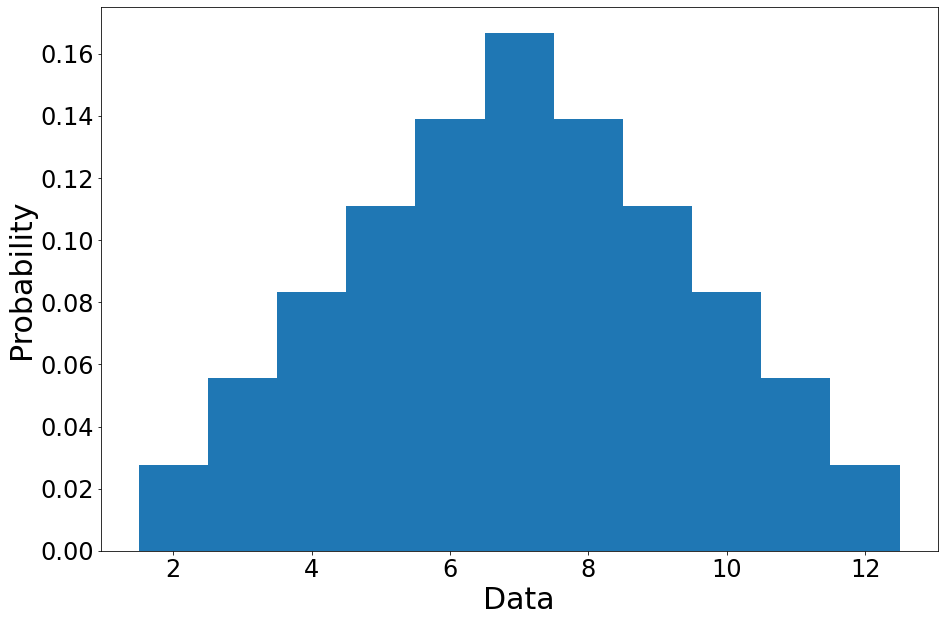

In [36]:
fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 24)
ax.stairs(c, bins, fill=True)
ax.set_xlabel('Data', fontsize = fsize)
ax.set_ylabel('Probability', fontsize = fsize)
plt.show()

## 3)

Calculating the mean and the variance of the distribution in Problem 2. Let's start with the **mean**:

In [37]:
mean = sum(dice_values*c)

Calculating the **variance**:

Var(X) = (x - µ)2 P(X = x) 

In [38]:
variance = sum((((dice_values - mean))**2)*c)
variance

5.833333333333334

In [39]:
print(f'The mean of the distribution is {mean} and the variance is {variance:.3f}.')

The mean of the distribution is 7.0 and the variance is 5.833.


## 4)

Now, using **10 dice**:

In [40]:
number_of_dice = 10
die = np.ones(6)*(1/6)
die

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [41]:
current_die = die
for i in range(0,9): # We have nine OTHER dice to convolve 
    current_die = signal.convolve(current_die, die)
current_die

array([1.65381717e-08, 1.65381717e-07, 9.09599443e-07, 3.63839777e-06,
       1.18247928e-05, 3.31094197e-05, 8.26081676e-05, 1.87542867e-04,
       3.92946959e-04, 7.67701930e-04, 1.40951530e-03, 2.44665712e-03,
       4.03407353e-03, 6.34189270e-03, 9.53533096e-03, 1.37465945e-02,
       1.90415547e-02, 2.53867551e-02, 3.26236936e-02, 4.04573294e-02,
       4.84643679e-02, 5.61241048e-02, 6.28704385e-02, 6.81581055e-02,
       7.15327194e-02, 7.26928060e-02, 7.15327194e-02, 6.81581055e-02,
       6.28704385e-02, 5.61241048e-02, 4.84643679e-02, 4.04573294e-02,
       3.26236936e-02, 2.53867551e-02, 1.90415547e-02, 1.37465945e-02,
       9.53533096e-03, 6.34189270e-03, 4.03407353e-03, 2.44665712e-03,
       1.40951530e-03, 7.67701930e-04, 3.92946959e-04, 1.87542867e-04,
       8.26081676e-05, 3.31094197e-05, 1.18247928e-05, 3.63839777e-06,
       9.09599443e-07, 1.65381717e-07, 1.65381717e-08])

In [42]:
number_of_dice = 10
bins2 = np.arange(number_of_dice, len(current_die)+number_of_dice+1)
bins2 = bins2 - (bins2[1]-bins2[0])/2
bins2

array([ 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5,
       20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5,
       31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5,
       42.5, 43.5, 44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5,
       53.5, 54.5, 55.5, 56.5, 57.5, 58.5, 59.5, 60.5])

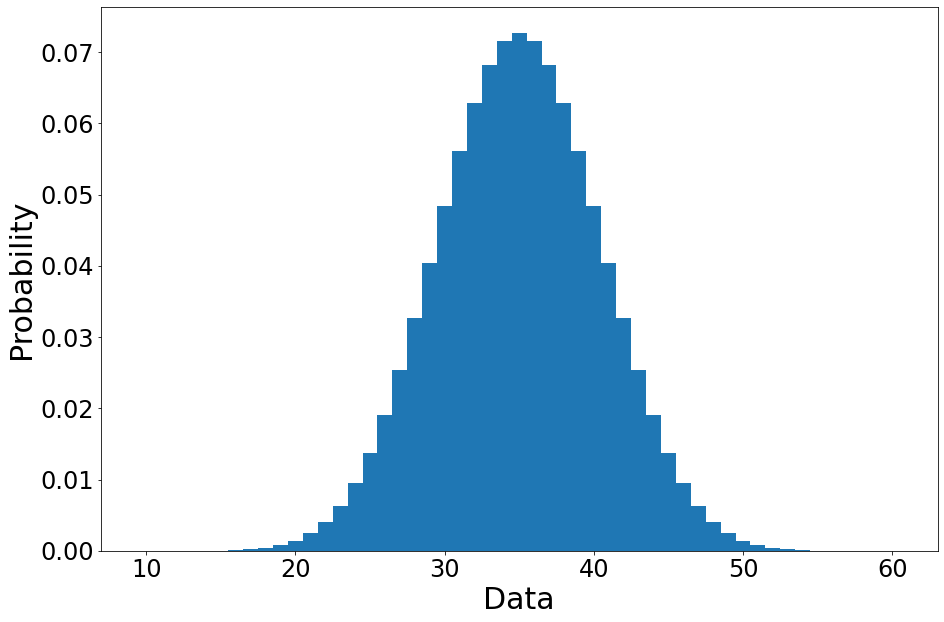

In [43]:
fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 24)
ax.stairs(current_die, bins2, fill=True)
ax.set_xlabel('Data', fontsize = fsize)
ax.set_ylabel('Probability', fontsize = fsize)
plt.show()

With 10 dice, we can start to believe that the distribution becomes Gaussian when looking at the graph above. Let's check if it is in fact Gaussian by graphing the plot on a semilog with the y-axis in log. For this to be a Gaussian distribution, it should have the shape of a **parabola** on a semilog plot.

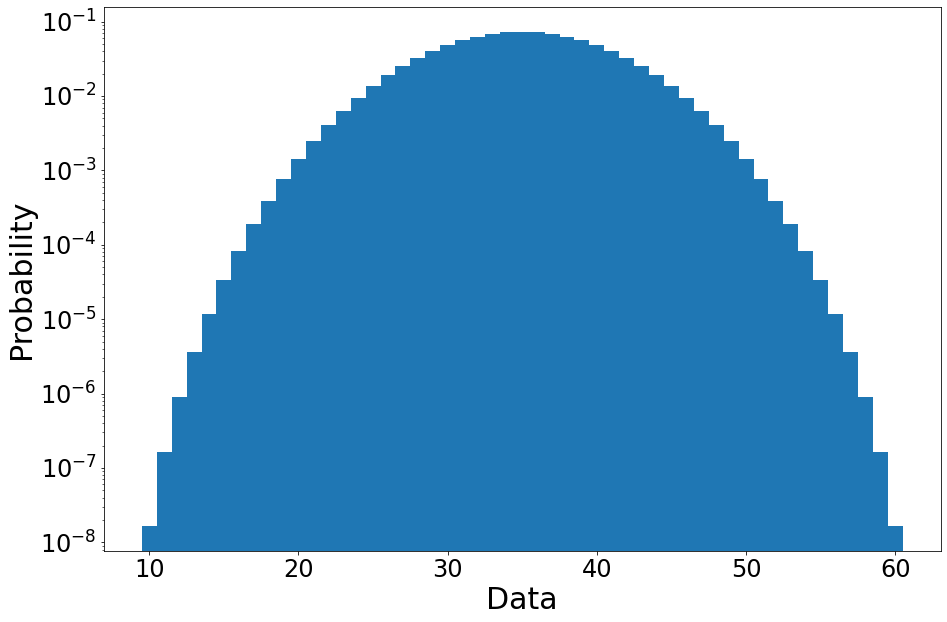

In [44]:
fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 24)
ax.stairs(current_die, bins2, fill=True)
ax.set_xlabel('Data', fontsize = fsize)
ax.set_ylabel('Probability', fontsize = fsize)
ax.set_yscale('log')
plt.show()

And, we in fact see that this distribution makes a parabolic shape. Thus, this distribution seems to in fact be Gaussian.

## 5)

Let's look at how convolutions can help filter out our signal when we integrate over it many times. We will be using a Gaussian distribution to look at this.

In [47]:
d = stats.norm.rvs(loc = 3.0, scale = .01, size = 100000)

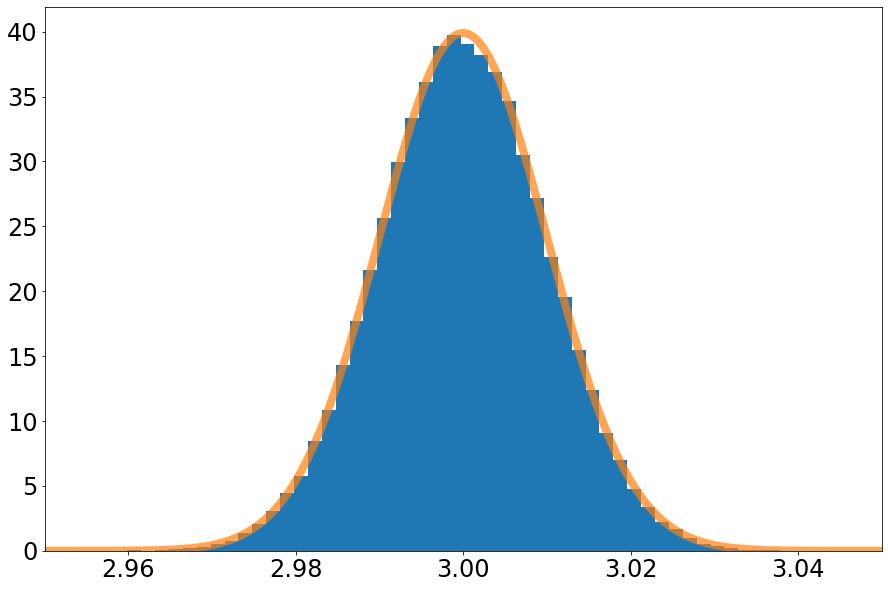

In [48]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([2.95,3.05])
x = np.linspace(2.95,3.05,1000)
ax.plot(x,stats.norm.pdf(x,loc = 3., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

In [59]:
current_d = d
for i in range(0,100): # We have nine OTHER dice to convolve 
    current_d = signal.convolve(current_d, d)
current_d

array([nan, nan, nan, ..., nan, nan, nan])

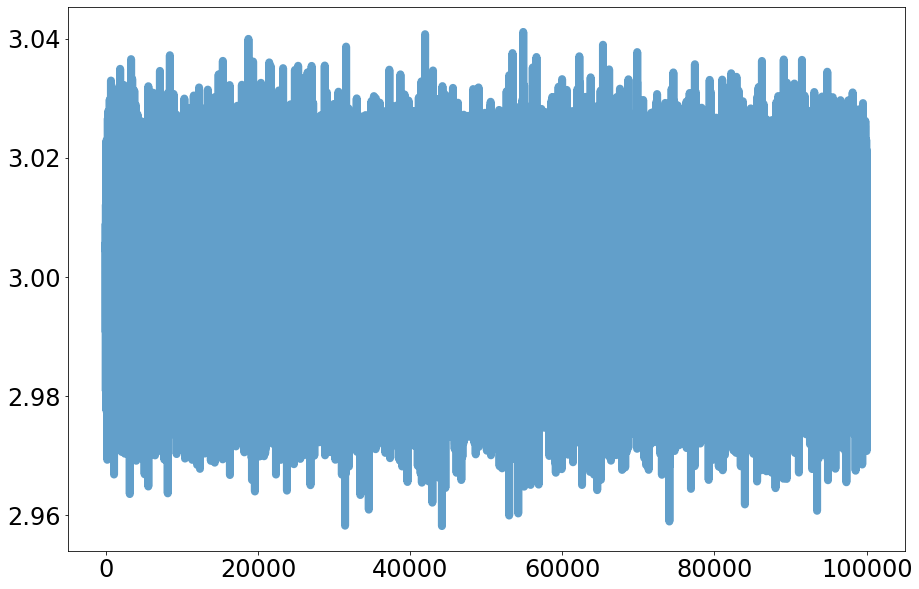

In [60]:
fig, ax = plt.subplots(1, 1)
#ax.hist(current_d,50, density=True)
plt.tick_params(labelsize = 24)
#plt.xlim([2.95,3.05])
x = np.linspace(2.95,3.05,1000)
ax.plot(np.arange(0,len(d)),d,linewidth = 8,alpha = 0.7)
plt.show()

As we can see, the standard deviation becomes smaller and smaller as we keep integrating. This makes are signal in turn more narrow and 'defined'.

Since we can integrate over a Gaussian many times so that it becomes narrower and more 'defined', we can essentially use this property to remove background noise and make our signal more clear and defined. This is a fantastic way to filter out what may be our actual signal in measurements.